# Import dependencies

In [213]:
import keypoint_moseq as kpms
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

%load_ext autoreload
%autoreload 2

# Calculate the syllables

In [169]:
project_dir= r'D:\Barrier_testing_day1_videos' # the full path to the project directory
model_name='2025_05_29-18_08_08' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

In [170]:
kpms.interactive_group_setting(project_dir, model_name)

BokehModel(combine_events=True, render_bundle={'docs_json': {'56b0feb4-6df4-4a15-96a1-0a2b63c25861': {'version…

In [171]:
kpms.compute_moseq_df(project_dir, model_name)

,name,centroid_x,centroid_y,heading,angular_velocity,velocity_px_s,syllable,frame_index,group,onset
0,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,695.752607,651.839085,-1.626624,0.000000,0.000000,0,0,Control_10cm,True
1,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,695.829276,651.254640,-1.626783,-0.107229,17.683563,0,1,Control_10cm,False
2,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,694.998691,650.385497,-1.626972,-0.206063,36.065952,0,2,Control_10cm,False
3,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,695.694442,649.854477,-1.627049,-0.285877,26.257310,0,3,Control_10cm,False
4,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,694.967617,649.238481,-1.670152,-0.334553,28.582420,0,4,Control_10cm,False
...,...,...,...,...,...,...,...,...,...,...
49642,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,693.388156,277.445654,-0.720470,1.107921,147.573100,3,82,Control_20cm,False
49643,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,694.833964,274.922962,-0.705956,0.938828,87.229049,3,83,Control_20cm,False
49644,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,694.639558,271.201725,-0.646499,0.735292,111.789325,3,84,Control_20cm,False
49645,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,694.536243,268.388532,-0.646499,0.504570,84.452685,3,85,Control_20cm,False


In [172]:
moseq_df = kpms.compute_moseq_df(project_dir, model_name, smooth_heading=True) 
moseq_df

,name,centroid_x,centroid_y,heading,angular_velocity,velocity_px_s,syllable,frame_index,group,onset
0,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,695.752607,651.839085,-1.626624,0.000000,0.000000,0,0,Control_10cm,True
1,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,695.829276,651.254640,-1.626783,-0.107229,17.683563,0,1,Control_10cm,False
2,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,694.998691,650.385497,-1.626972,-0.206063,36.065952,0,2,Control_10cm,False
3,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,695.694442,649.854477,-1.627049,-0.285877,26.257310,0,3,Control_10cm,False
4,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,694.967617,649.238481,-1.670152,-0.334553,28.582420,0,4,Control_10cm,False
...,...,...,...,...,...,...,...,...,...,...
49642,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,693.388156,277.445654,-0.720470,1.107921,147.573100,3,82,Control_20cm,False
49643,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,694.833964,274.922962,-0.705956,0.938828,87.229049,3,83,Control_20cm,False
49644,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,694.639558,271.201725,-0.646499,0.735292,111.789325,3,84,Control_20cm,False
49645,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,694.536243,268.388532,-0.646499,0.504570,84.452685,3,85,Control_20cm,False


In [173]:
moseq_df = moseq_df[~moseq_df['syllable'].isin(range(8, 14))]


In [174]:
# Split the 'group' column into 'condition' and 'experiment' based on the underscore
moseq_df[['condition', 'experiment']] = moseq_df['group'].str.split('_', expand=True)

# Drop the original 'group' column
moseq_df = moseq_df.drop(columns=['group'])

# Verify the changes
print(moseq_df[['condition', 'experiment']].head())

  condition experiment
0   Control       10cm
1   Control       10cm
2   Control       10cm
3   Control       10cm
4   Control       10cm


C:\Users\Jillian.Sucher\AppData\Local\Temp\ipykernel_19812\1109664735.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jillian.Sucher\AppData\Local\Temp\ipykernel_19812\1109664735.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [189]:
import re

# Function to extract subject ID (e.g., wt123)
def extract_subject(name):
    match = re.search(r'(wt\d+)', name, re.IGNORECASE)
    return match.group(1) if match else None

# Function to extract trial number (number before "DLC")
def extract_trial(name):
    match = re.search(r'(\d+)[^\d]*DLC', name, re.IGNORECASE)
    return int(match.group(1)) if match else None

# Apply both extractions
moseq_df['subject'] = moseq_df['name'].apply(extract_subject)
moseq_df['trial'] = moseq_df['name'].apply(extract_trial)

# Create analysis_df with selected columns
analysis_df = moseq_df[['subject', 'condition', 'experiment', 'trial', 'syllable']].dropna()

# Optional: preview
print(analysis_df.head())


  subject condition experiment  trial  syllable
0   WT027   Control       10cm      0         0
1   WT027   Control       10cm      0         0
2   WT027   Control       10cm      0         0
3   WT027   Control       10cm      0         0
4   WT027   Control       10cm      0         0


In [176]:
# import re

# # Function to extract subject ID
# def extract_subject(name):
#     match = re.search(r'(wt\d+)', name, re.IGNORECASE)
#     return match.group(1) if match else None

# # Apply extraction
# moseq_df['subject'] = moseq_df['name'].apply(extract_subject)

# # Create analysis_df with only the relevant columns and drop rows with missing values
# analysis_df = moseq_df[['subject', 'condition', 'experiment', 'syllable']].dropna()

# # Optional: check results
# print(analysis_df.head())


In [190]:
analysis_df

,subject,condition,experiment,trial,syllable
0,WT027,Control,10cm,0,0
1,WT027,Control,10cm,0,0
2,WT027,Control,10cm,0,0
3,WT027,Control,10cm,0,0
4,WT027,Control,10cm,0,0
...,...,...,...,...,...
49642,WT061,Control,20cm,9,3
49643,WT061,Control,20cm,9,3
49644,WT061,Control,20cm,9,3
49645,WT061,Control,20cm,9,3


# Syllable frequency

In [191]:
# Step 1: Count how many times each subject used each syllable in each experiment and trial
syllable_counts = (
    analysis_df.groupby(['subject', 'experiment', 'trial', 'syllable'])
    .size()
    .reset_index(name='count')
)

# Step 2: Total number of syllables per subject per experiment and trial
total_counts = (
    analysis_df.groupby(['subject', 'experiment', 'trial'])
    .size()
    .reset_index(name='total')
)

# Step 3: Merge and compute ratio
merged = pd.merge(syllable_counts, total_counts, on=['subject', 'experiment', 'trial'])
merged['ratio'] = merged['count'] / merged['total']

# Step 4: Merge condition info (assumed constant per subject, experiment, and trial)
subject_info = analysis_df[['subject', 'experiment', 'trial', 'condition']].drop_duplicates()
new_analysis_df = pd.merge(merged, subject_info, on=['subject', 'experiment', 'trial'])

# Step 5: Keep only required columns
new_analysis_df = new_analysis_df[['syllable', 'subject', 'condition', 'experiment', 'trial', 'ratio']]

# Optional: inspect
print(new_analysis_df.head())


   syllable subject condition experiment  trial  ratio
0         0   WT022     CNSDS       10cm      0   0.10
1         1   WT022     CNSDS       10cm      0   0.22
2         3   WT022     CNSDS       10cm      0   0.04
3         4   WT022     CNSDS       10cm      0   0.58
4         5   WT022     CNSDS       10cm      0   0.06


In [ ]:
# # Step 1: Count how many times each subject used each syllable in each experiment
# syllable_counts = analysis_df.groupby(['subject', 'experiment', 'syllable']).size().reset_index(name='count')

# # Step 2: Total number of syllables per subject per experiment
# total_counts = analysis_df.groupby(['subject', 'experiment']).size().reset_index(name='total')

# # Step 3: Merge and compute ratio
# merged = pd.merge(syllable_counts, total_counts, on=['subject', 'experiment'])
# merged['ratio'] = merged['count'] / merged['total']

# # Step 4: Merge condition info (assumed constant per subject per experiment)
# subject_info = analysis_df[['subject', 'experiment', 'condition']].drop_duplicates()
# new_analysis_df = pd.merge(merged, subject_info, on=['subject', 'experiment'])

# # Step 5: Keep only required columns
# new_analysis_df = new_analysis_df[['syllable', 'subject', 'condition', 'experiment', 'ratio']]

# # Optional: inspect
# print(new_analysis_df.head())


   syllable subject condition experiment     ratio
0         0   WT022     CNSDS       10cm  0.098712
1         1   WT022     CNSDS       10cm  0.182403
2         2   WT022     CNSDS       10cm  0.055794
3         3   WT022     CNSDS       10cm  0.103004
4         4   WT022     CNSDS       10cm  0.437768


In [178]:
# # Group by 'condition', 'experiment', and 'syllable' to calculate frequency
# syllable_counts = moseq_df.groupby(['condition', 'experiment', 'syllable']).size().reset_index(name='frequency')

# # Create a pivot table for easier plotting
# syllable_pivot = syllable_counts.pivot_table(index=['condition', 'experiment'], 
#                                              columns='syllable', 
#                                              values='frequency', 
#                                              aggfunc='sum', 
#                                              fill_value=0)

# # Plotting the bar graph
# syllable_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# # Adding labels and title
# plt.xlabel('Condition and Experiment')
# plt.ylabel('Frequency of Syllables')
# plt.title('Frequency of Each Syllable')

# # Show the plot
# plt.tight_layout()  # Adjust layout to fit labels
# plt.show()


In [198]:
# Export to CSV
merged.to_csv("merged.csv", index=False)

In [199]:
merged

,subject,experiment,trial,syllable,count,total,ratio
0,WT022,10cm,0,0,5,50,0.100000
1,WT022,10cm,0,1,11,50,0.220000
2,WT022,10cm,0,3,2,50,0.040000
3,WT022,10cm,0,4,29,50,0.580000
4,WT022,10cm,0,5,3,50,0.060000
...,...,...,...,...,...,...,...
4963,WT061,20cm,9,3,7,87,0.080460
4964,WT061,20cm,9,4,16,87,0.183908
4965,WT061,20cm,9,5,2,87,0.022989
4966,WT061,20cm,9,6,2,87,0.022989



T-TEST RESULTS:

Experiment: 10cm, Syllable: 0
  t = 0.232, raw p = 0.8173, Bonferroni p = 1.0000, df = 223
  Control (n=81): mean = 0.106, std = 0.074
  CNSDS   (n=144): mean = 0.104, std = 0.060

Experiment: 10cm, Syllable: 1
  t = 6.175, raw p = 0.0000, Bonferroni p = 0.0000, df = 280
  Control (n=134): mean = 0.200, std = 0.122
  CNSDS   (n=148): mean = 0.119, std = 0.097

Experiment: 10cm, Syllable: 2
  t = -0.004, raw p = 0.9970, Bonferroni p = 1.0000, df = 164
  Control (n=52): mean = 0.087, std = 0.163
  CNSDS   (n=114): mean = 0.087, std = 0.070

Experiment: 10cm, Syllable: 3
  t = 3.489, raw p = 0.0006, Bonferroni p = 0.0137, df = 269
  Control (n=124): mean = 0.138, std = 0.076
  CNSDS   (n=147): mean = 0.107, std = 0.070

Experiment: 10cm, Syllable: 4
  t = 1.071, raw p = 0.2853, Bonferroni p = 1.0000, df = 290
  Control (n=138): mean = 0.531, std = 0.168
  CNSDS   (n=154): mean = 0.509, std = 0.180

Experiment: 10cm, Syllable: 5
  t = 3.208, raw p = 0.0017, Bonferroni p =

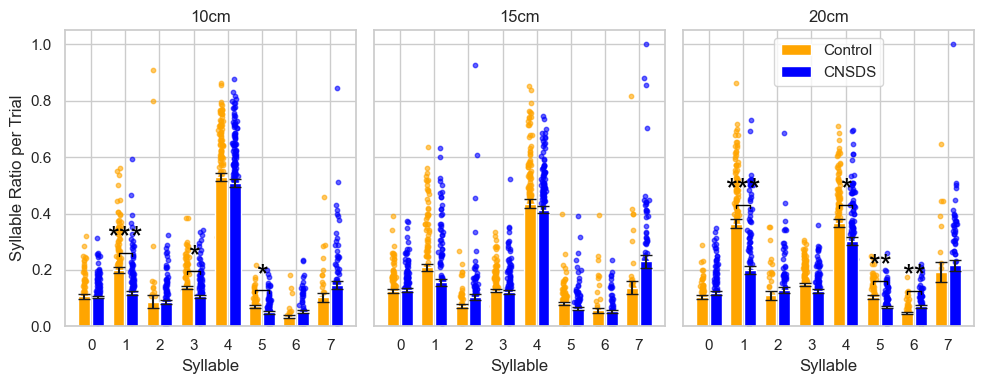

In [196]:
sns.set(style="whitegrid")

# Define colors
colors = {'Control': 'orange', 'CNSDS': 'blue'}

# Create subplots for each experiment
experiments = new_analysis_df['experiment'].unique()
n_experiments = len(experiments)
fig, axes = plt.subplots(1, n_experiments, figsize=(10, 4), sharey=True)

# Ensure axes is iterable
if n_experiments == 1:
    axes = [axes]

print("\nT-TEST RESULTS:\n")

# Count total number of comparisons (syllables × experiments) for Bonferroni
total_tests = sum(
    new_analysis_df[new_analysis_df['experiment'] == exp]['syllable'].nunique()
    for exp in experiments
)

for i, exp in enumerate(experiments):
    ax = axes[i]
    exp_data = new_analysis_df[new_analysis_df['experiment'] == exp]
    syllables = sorted(exp_data['syllable'].unique())

    for syll in syllables:
        syll_data = exp_data[exp_data['syllable'] == syll]

        means = {}
        sems = {}

        for cond in ['Control', 'CNSDS']:
            cond_data = syll_data[syll_data['condition'] == cond]['ratio']
            x_vals = np.random.normal(
                loc=syll + (-0.2 if cond == 'Control' else 0.2),
                scale=0.03,
                size=len(cond_data)
            )

            # Scatter individual trial values
            ax.scatter(x_vals, cond_data, color=colors[cond], alpha=0.6, s=10)

            # Mean and SEM for bar
            means[cond] = cond_data.mean()
            sems[cond] = cond_data.sem()

            ax.bar(
                syll + (-0.2 if cond == 'Control' else 0.2),
                means[cond],
                yerr=sems[cond],
                width=0.35,
                color=colors[cond],
                capsize=4,
                label=cond if syll == syllables[0] else None
            )

        # T-test
        control_vals = syll_data[syll_data['condition'] == 'Control']['ratio']
        cnsds_vals = syll_data[syll_data['condition'] == 'CNSDS']['ratio']

        if len(control_vals) > 1 and len(cnsds_vals) > 1:
            t_stat, p_val = ttest_ind(control_vals, cnsds_vals, equal_var=False)
            p_bonf = min(p_val * total_tests, 1.0)
            df = len(control_vals) + len(cnsds_vals) - 2

            # Print t-test results
            print(f"Experiment: {exp}, Syllable: {syll}")
            print(f"  t = {t_stat:.3f}, raw p = {p_val:.4f}, Bonferroni p = {p_bonf:.4f}, df = {df}")
            print(f"  Control (n={len(control_vals)}): mean = {control_vals.mean():.3f}, std = {control_vals.std():.3f}")
            print(f"  CNSDS   (n={len(cnsds_vals)}): mean = {cnsds_vals.mean():.3f}, std = {cnsds_vals.std():.3f}\n")

            # Annotate significance
            if p_bonf < 0.05:
                x1, x2 = syll - 0.2, syll + 0.2
                max_y = max(means['Control'] + sems['Control'], means['CNSDS'] + sems['CNSDS']) + 0.05

                ax.plot([x1, x1, x2, x2], [max_y - 0.01, max_y, max_y, max_y - 0.01], color='black', linewidth=1)

                if p_bonf < 0.001:
                    star = '***'
                elif p_bonf < 0.01:
                    star = '**'
                else:
                    star = '*'

                ax.text((x1 + x2) / 2, max_y - 0.005, star, ha='center', va='bottom', color='black', fontsize=22)
        else:
            print(f"Experiment: {exp}, Syllable: {syll} — Not enough data for t-test\n")

    ax.set_title(f"{exp}")
    ax.set_xlabel("Syllable")
    ax.set_xticks(syllables)
    if i == 0:
        ax.set_ylabel("Syllable Ratio per Trial")  # Updated label

plt.tight_layout()
plt.legend()
plt.savefig("syllable_frequency.pdf", format="pdf")
plt.show()



T-TEST RESULTS:

Experiment: 10cm, Syllable: 0
  t = -2.364, raw p = 0.0282, Bonferroni p = 0.6778, df = 28
  Control (n=14): mean = 0.059, std = 0.034
  CNSDS   (n=16): mean = 0.083, std = 0.019

Experiment: 10cm, Syllable: 1
  t = 4.190, raw p = 0.0005, Bonferroni p = 0.0115, df = 28
  Control (n=14): mean = 0.175, std = 0.066
  CNSDS   (n=16): mean = 0.092, std = 0.036

Experiment: 10cm, Syllable: 2
  t = -4.017, raw p = 0.0006, Bonferroni p = 0.0145, df = 28
  Control (n=14): mean = 0.024, std = 0.019
  CNSDS   (n=16): mean = 0.070, std = 0.041

Experiment: 10cm, Syllable: 3
  t = 1.836, raw p = 0.0804, Bonferroni p = 1.0000, df = 28
  Control (n=14): mean = 0.118, std = 0.046
  CNSDS   (n=16): mean = 0.091, std = 0.029

Experiment: 10cm, Syllable: 4
  t = 0.839, raw p = 0.4088, Bonferroni p = 1.0000, df = 28
  Control (n=14): mean = 0.552, std = 0.126
  CNSDS   (n=16): mean = 0.512, std = 0.136

Experiment: 10cm, Syllable: 5
  t = -0.264, raw p = 0.7935, Bonferroni p = 1.0000, df

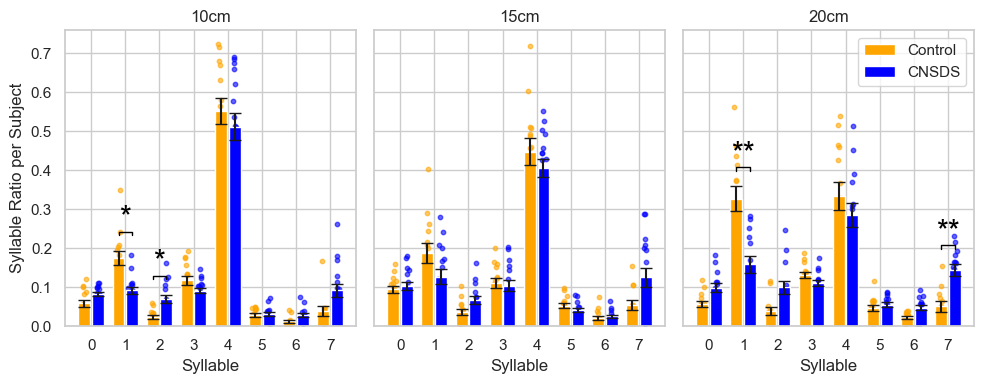

In [ ]:
# sns.set(style="whitegrid")

# # Define colors
# colors = {'Control': 'orange', 'CNSDS': 'blue'}

# # Create subplots for each experiment
# experiments = new_analysis_df['experiment'].unique()
# n_experiments = len(experiments)
# fig, axes = plt.subplots(1, n_experiments, figsize=(10, 4), sharey=True)

# # Ensure axes is iterable
# if n_experiments == 1:
#     axes = [axes]

# print("\nT-TEST RESULTS:\n")

# # Count total number of comparisons (syllables × experiments)
# total_tests = sum(
#     len(new_analysis_df[new_analysis_df['experiment'] == exp]['syllable'].unique())
#     for exp in experiments
# )

# for i, exp in enumerate(experiments):
#     ax = axes[i]
#     exp_data = new_analysis_df[new_analysis_df['experiment'] == exp]
#     syllables = sorted(exp_data['syllable'].unique())

#     for syll in syllables:
#         syll_data = exp_data[exp_data['syllable'] == syll]

#         means = {}
#         sems = {}

#         for cond in ['Control', 'CNSDS']:
#             cond_data = syll_data[syll_data['condition'] == cond]['ratio']
#             x_vals = np.random.normal(
#                 loc=syll + (-0.2 if cond == 'Control' else 0.2),
#                 scale=0.03,
#                 size=len(cond_data)
#             )

#             # Plot individual data points
#             ax.scatter(x_vals, cond_data, color=colors[cond], alpha=0.6, s=10)

#             # Store mean & SEM for annotation later
#             means[cond] = cond_data.mean()
#             sems[cond] = cond_data.sem()

#             # Plot mean ± SEM as a bar
#             ax.bar(
#                 syll + (-0.2 if cond == 'Control' else 0.2),
#                 means[cond],
#                 yerr=sems[cond],
#                 width=0.35,
#                 color=colors[cond],
#                 capsize=4,
#                 label=cond if syll == syllables[0] else None
#             )

#         # T-test
#         control_vals = syll_data[syll_data['condition'] == 'Control']['ratio']
#         cnsds_vals = syll_data[syll_data['condition'] == 'CNSDS']['ratio']

#         if len(control_vals) > 1 and len(cnsds_vals) > 1:
#             t_stat, p_val = ttest_ind(control_vals, cnsds_vals, equal_var=False)
#             p_bonf = min(p_val * total_tests, 1.0)
#             df = len(control_vals) + len(cnsds_vals) - 2

#             # Print t-test results
#             print(f"Experiment: {exp}, Syllable: {syll}")
#             print(f"  t = {t_stat:.3f}, raw p = {p_val:.4f}, Bonferroni p = {p_bonf:.4f}, df = {df}")
#             print(f"  Control (n={len(control_vals)}): mean = {control_vals.mean():.3f}, std = {control_vals.std():.3f}")
#             print(f"  CNSDS   (n={len(cnsds_vals)}): mean = {cnsds_vals.mean():.3f}, std = {cnsds_vals.std():.3f}\n")

#             # Annotate significance with asterisks
#             if p_bonf < 0.05:
#                 x1, x2 = syll - 0.2, syll + 0.2
#                 max_y = max(means['Control'] + sems['Control'], means['CNSDS'] + sems['CNSDS']) + 0.05

#                 # Plot line
#                 ax.plot([x1, x1, x2, x2], [max_y - 0.01, max_y, max_y, max_y - 0.01], color='black', linewidth=1)

#                 # Choose significance level
#                 if p_bonf < 0.001:
#                     star = '***'
#                 elif p_bonf < 0.01:
#                     star = '**'
#                 else:
#                     star = '*'

#                 # Plot asterisk
#                 ax.text((x1 + x2) / 2, max_y - 0.005, star, ha='center', va='bottom', color='black', fontsize=22)
#         else:
#             print(f"Experiment: {exp}, Syllable: {syll} — Not enough data for t-test\n")

#     ax.set_title(f"{exp}")
#     ax.set_xlabel("Syllable")
#     ax.set_xticks(syllables)
#     if i == 0:
#         ax.set_ylabel("Syllable Ratio per Subject")

# plt.tight_layout()
# plt.legend()
# plt.savefig("syllable_frequency.pdf", format="pdf")
# plt.show()


In [197]:
# Export to CSV
new_analysis_df.to_csv("new_analysis_df.csv", index=False)


In [182]:
# sns.set(style="whitegrid")

# # Define colors
# colors = {'Control': 'orange', 'CNSDS': 'blue'}

# # Create subplots for each experiment
# experiments = new_analysis_df['experiment'].unique()
# n_experiments = len(experiments)
# fig, axes = plt.subplots(1, n_experiments, figsize=(8, 6), sharey=True)

# # Ensure axes is always iterable
# if n_experiments == 1:
#     axes = [axes]

# print("\nT-TEST RESULTS:\n")

# # Count total number of comparisons (syllables × experiments)
# total_tests = sum(
#     len(new_analysis_df[new_analysis_df['experiment'] == exp]['syllable'].unique())
#     for exp in new_analysis_df['experiment'].unique()
# )

# for i, exp in enumerate(experiments):
#     ax = axes[i]
#     exp_data = new_analysis_df[new_analysis_df['experiment'] == exp]
#     syllables = sorted(exp_data['syllable'].unique())

#     for syll in syllables:
#         syll_data = exp_data[exp_data['syllable'] == syll]
        
#         for j, cond in enumerate(['Control', 'CNSDS']):
#             cond_data = syll_data[syll_data['condition'] == cond]['ratio']
#             x_vals = np.random.normal(loc=syll + (-0.2 if cond == 'Control' else 0.2),
#                                       scale=0.03,
#                                       size=len(cond_data))
#             # Plot individual points
#             ax.scatter(x_vals, cond_data, color=colors[cond], alpha=0.6, s= 10)

#             # Mean ± SEM
#             mean = cond_data.mean()
#             sem = cond_data.sem()
#             ax.bar(syll + (-0.2 if cond == 'Control' else 0.2),
#                    mean,
#                    yerr=sem,
#                    width=0.35,
#                    color=colors[cond],
#                    capsize=4,
#                    label=cond if syll == syllables[0] else None)

#                 # T-test
#         control_vals = syll_data[syll_data['condition'] == 'Control']['ratio']
#         cnsds_vals = syll_data[syll_data['condition'] == 'CNSDS']['ratio']
        
#         if len(control_vals) > 1 and len(cnsds_vals) > 1:
#             t_stat, p_val = ttest_ind(control_vals, cnsds_vals, equal_var=False)
#             p_bonf = min(p_val * total_tests, 1.0)
#             df = len(control_vals) + len(cnsds_vals) - 2
        
#             print(f"Experiment: {exp}, Syllable: {syll}")
#             print(f"  t = {t_stat:.3f}, raw p = {p_val:.4f}, Bonferroni p = {p_bonf:.4f}, df = {df}")
#             print(f"  Control (n={len(control_vals)}): mean = {control_vals.mean():.3f}, std = {control_vals.std():.3f}")
#             print(f"  CNSDS   (n={len(cnsds_vals)}): mean = {cnsds_vals.mean():.3f}, std = {cnsds_vals.std():.3f}\n")
#         else:
#             print(f"Experiment: {exp}, Syllable: {syll} — Not enough data for t-test\n")


#     ax.set_title(f"{exp}")
#     ax.set_xlabel("Syllable")
#     ax.set_xticks(syllables)
#     if i == 0:
#         ax.set_ylabel("Syllable Ratio per Subject")

# plt.tight_layout()
# plt.legend()
# plt.savefig("syllable_frequency.pdf", format="pdf")
# plt.show()


In [183]:
# # Determine number of subplots
# n_plots = len(syllable_pivot)
# n_cols = 3  # 3 columns
# n_rows = (n_plots + n_cols - 1) // n_cols  # ceiling division

# # Create subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
# axes = axes.flatten()

# # Loop through each group and create a pie chart
# for i, (idx, row) in enumerate(syllable_pivot.iterrows()):
#     condition, experiment = idx
#     frequencies = row[row > 0]

#     axes[i].pie(
#         frequencies,
#         labels=frequencies.index,
#         autopct='%1.1f%%',
#         startangle=140
#     )
#     axes[i].set_title(f'{condition}, {experiment}')
#     axes[i].axis('equal')

# # Hide any unused subplots
# for j in range(i + 1, len(axes)):
#     axes[j].axis('off')

# # Set layout
# plt.suptitle('Syllable Distribution', fontsize=16)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

In [184]:
syll_include

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [200]:
new_analysis_df

,syllable,subject,condition,experiment,trial,ratio
0,0,WT022,CNSDS,10cm,0,0.100000
1,1,WT022,CNSDS,10cm,0,0.220000
2,3,WT022,CNSDS,10cm,0,0.040000
3,4,WT022,CNSDS,10cm,0,0.580000
4,5,WT022,CNSDS,10cm,0,0.060000
...,...,...,...,...,...,...
4963,3,WT061,Control,20cm,9,0.080460
4964,4,WT061,Control,20cm,9,0.183908
4965,5,WT061,Control,20cm,9,0.022989
4966,6,WT061,Control,20cm,9,0.022989


# Syllable location

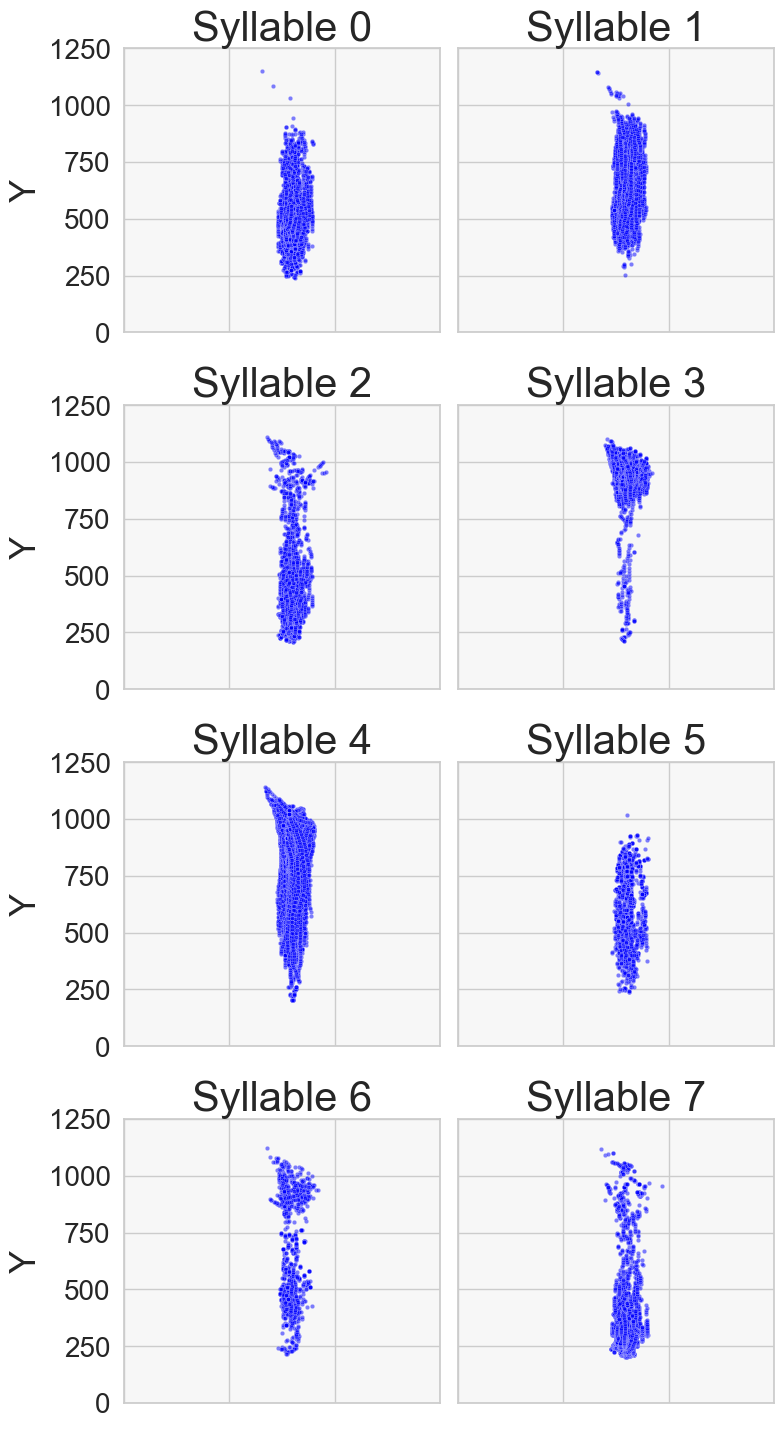

In [ ]:
# Get unique syllables
syllables = sorted(moseq_df['syllable'].unique())
n_syllables = len(syllables)

# Define rows and columns
nrows, ncols = 7, 2  # Adjust this if your syllable count changes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 25), sharex=True, sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()

for i, syllable in enumerate(syllables):
    ax = axes[i]
    syllable_df = moseq_df[moseq_df['syllable'] == syllable]

        # Flip coordinates to rotate 180°
    rotated_df = syllable_df.copy()
    rotated_df['centroid_x'] = 1500 - rotated_df['centroid_x']
    rotated_df['centroid_y'] = 1250 - rotated_df['centroid_y']

    sns.scatterplot(
        x='centroid_x',
        y='centroid_y',
        data=rotated_df,
        ax=ax,
        color='blue',
        s=10,
        alpha=0.5
    )
    
    ax.set_title(f'Syllable {syllable}', fontsize=30)
    ax.set_xlim(0, 1500)
    ax.set_ylim(0, 1250)
    ax.set_xlabel('X', fontsize=25)
    ax.set_ylabel('Y', fontsize=25)
    ax.set_facecolor('#f7f7f7')
    ax.tick_params(labelsize=20)

# Hide any unused axes
for j in range(len(syllables), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("D:/Figures/syllable_locations.pdf", format="pdf")
plt.show()


In [ ]:
moseq_df

,name,centroid_x,centroid_y,heading,angular_velocity,velocity_px_s,syllable,frame_index,group,onset
0,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,695.752607,651.839085,-1.626624,0.000000,0.000000,0,0,Control_10cm,True
1,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,695.829276,651.254640,-1.626783,-0.107229,17.683563,0,1,Control_10cm,False
2,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,694.998691,650.385497,-1.626972,-0.206063,36.065952,0,2,Control_10cm,False
3,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,695.694442,649.854477,-1.627049,-0.285877,26.257310,0,3,Control_10cm,False
4,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,694.967617,649.238481,-1.670152,-0.334553,28.582420,0,4,Control_10cm,False
...,...,...,...,...,...,...,...,...,...,...
49642,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,693.388156,277.445654,-0.720470,1.107921,147.573100,3,82,Control_20cm,False
49643,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,694.833964,274.922962,-0.705956,0.938828,87.229049,3,83,Control_20cm,False
49644,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,694.639558,271.201725,-0.646499,0.735292,111.789325,3,84,Control_20cm,False
49645,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,694.536243,268.388532,-0.646499,0.504570,84.452685,3,85,Control_20cm,False


In [ ]:
stats_df = kpms.compute_stats_df(
    project_dir,
    model_name,
    moseq_df,
    min_frequency=0.005,  # threshold frequency for including a syllable in the dataframe
    groupby=["group", "name"],  # column(s) to group the dataframe by
    fps=60,
)  # frame rate of the video from which keypoints were inferred

stats_df

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
0,CNSDS_10cm,031524_Barrier_Testing_10cm_Day_1_WT030FCNSDS_...,0,-1.399925,0.050339,-1.492681,-1.358580,-0.271741,0.208835,-0.548735,0.000000,51.593183,38.257132,0.000000,108.853467,0.3000,0.044444
1,CNSDS_10cm,031524_Barrier_Testing_10cm_Day_1_WT030FCNSDS_...,1,-1.578071,0.042723,-1.631502,-1.520851,-0.556363,0.040953,-0.589425,-0.481063,198.749575,54.059611,144.311577,275.631436,0.1000,0.100000
2,CNSDS_10cm,031524_Barrier_Testing_10cm_Day_1_WT030FCNSDS_...,2,-1.378482,NaN,-1.378482,-1.378482,-0.242371,NaN,-0.242371,-0.242371,39.523943,NaN,39.523943,39.523943,0.1000,0.016667
3,CNSDS_10cm,031524_Barrier_Testing_10cm_Day_1_WT030FCNSDS_...,3,-0.879586,0.072127,-0.968714,-0.800889,0.736861,0.163959,0.454693,0.866911,78.980763,32.169324,38.790815,122.040516,0.1000,0.100000
4,CNSDS_10cm,031524_Barrier_Testing_10cm_Day_1_WT030FCNSDS_...,4,-1.756557,0.302461,-2.159913,-1.007003,0.183725,0.544439,-0.882832,1.032774,176.649145,171.227969,4.773190,615.867154,0.1000,1.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,Control_20cm,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,3,-0.714828,0.080318,-0.857094,-0.646499,0.874591,0.397155,0.256351,1.338770,141.876073,83.163005,58.999538,292.485182,0.0625,0.116667
5225,Control_20cm,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,4,-1.182293,0.164725,-1.364557,-0.860085,0.955527,0.374551,0.525456,1.447445,515.234236,129.107392,271.752030,694.746173,0.0625,0.266667
5226,Control_20cm,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,5,-1.644141,0.280076,-1.842184,-1.446097,-0.833509,0.301229,-1.046510,-0.620507,212.437445,21.059138,197.546386,227.328504,0.1250,0.016667
5227,Control_20cm,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,6,-1.591360,0.002630,-1.593220,-1.589500,-0.978419,0.076010,-1.032167,-0.924672,247.670513,20.255779,233.347515,261.993512,0.0625,0.033333


## Old

In [ ]:
#kpms.label_syllables(project_dir, model_name, moseq_df)

AssertionError: No grid movies found. Please run `generate_grid_movies` as described in the docs: https://keypoint-moseq.readthedocs.io/en/latest/modeling.html#visualization

c:\Users\Jillian.Sucher\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Jillian.Sucher\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Jillian.Sucher\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Jillian.Sucher\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When groupi

Saved figure to D:\Barrier_testing_day1_videos\2025_04_30-15_25_52\figures\frequency_stat_stats.png


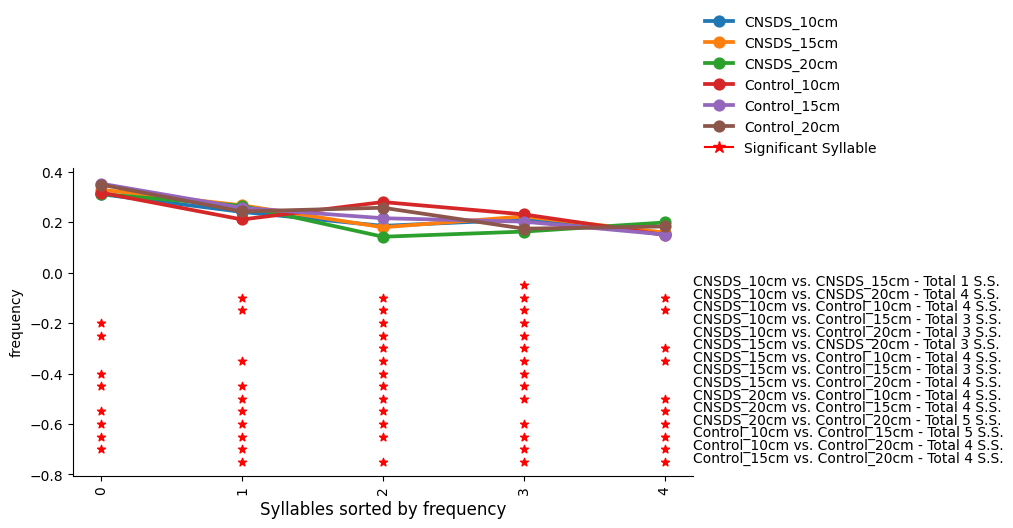

In [ ]:
# kpms.plot_syll_stats_with_sem(
#     stats_df,
#     project_dir,
#     model_name,
#     plot_sig=True,  # whether to mark statistical significance with a star
#     thresh=0.05,  # significance threshold
#     stat="frequency",  # statistic to be plotted (e.g. 'duration' or 'velocity_px_s_mean')
#     order="stat",  # order syllables by overall frequency ("stat") or degree of difference ("diff")
#     ctrl_group="a",  # name of the control group for statistical testing
#     exp_group="b",  # name of the experimental group for statistical testing
#     figsize=(8, 4),  # figure size
#     groups=stats_df["group"].unique(),  # groups to be plotted
# );

In [ ]:
#stats_df[stats_df['group'] == 'Control_10cm']

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
2027,Control_10cm,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,0,-1.715045,0.030619,-1.768582,-1.675453,0.138614,0.271750,-0.316658,0.514696,77.384239,51.566725,10.025256,161.994979,0.200000,0.072222
2028,Control_10cm,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,1,-1.673251,0.035512,-1.741263,-1.649748,-0.128101,0.177439,-0.320459,0.144914,39.299669,35.835927,0.000000,107.167950,0.133333,0.050000
2029,Control_10cm,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,2,-1.608683,0.294673,-2.029315,-1.057436,-0.483310,0.776482,-1.909602,0.786665,147.980064,58.768572,26.562262,236.792873,0.266667,0.266667
2030,Control_10cm,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,3,-1.668949,0.337448,-2.060380,-0.984377,0.308741,0.574375,-1.557297,1.494562,68.768365,50.221607,5.878280,235.489081,0.400000,0.250000
2031,Control_10cm,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,0,-1.875612,0.085647,-1.936173,-1.815050,-1.073393,0.103597,-1.146647,-1.000139,55.165148,24.920153,37.543939,72.786357,0.142857,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,Control_10cm,06262024_Barrier_Testing_10cm_Day_1_WT061FCont...,0,-1.406362,0.473902,-1.914481,-0.901491,0.314659,0.249221,0.000000,0.923072,154.559928,133.464129,0.000000,421.097892,0.363636,0.054167
2578,Control_10cm,06262024_Barrier_Testing_10cm_Day_1_WT061FCont...,1,-1.727845,0.098483,-1.789190,-1.557642,0.537880,0.415032,-0.111419,0.952365,360.185908,73.259546,294.338890,476.297550,0.272727,0.027778
2579,Control_10cm,06262024_Barrier_Testing_10cm_Day_1_WT061FCont...,2,-1.260532,0.212659,-1.602684,-0.968425,0.920222,0.226872,0.566117,1.256490,492.360083,146.401828,266.651672,755.364309,0.181818,0.175000
2580,Control_10cm,06262024_Barrier_Testing_10cm_Day_1_WT061FCont...,3,-1.752761,0.051513,-1.844447,-1.713802,0.342924,0.277317,-0.114428,0.607830,179.798414,57.518159,81.684619,282.181857,0.090909,0.150000


In [ ]:
# import matplotlib.pyplot as plt

# # Group by 'condition', 'experiment', and 'syllable' to calculate frequency
# syllable_counts = moseq_df.groupby(['group', 'experiment', 'syllable']).size().reset_index(name='frequency')

# # Create a pivot table for easier plotting
# syllable_pivot = syllable_counts.pivot_table(index=['group', 'experiment'], 
#                                              columns='syllable', 
#                                              values='frequency', 
#                                              aggfunc='sum', 
#                                              fill_value=0)

# # Plotting the bar graph
# syllable_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# # Adding labels and title
# plt.xlabel('Condition and Experiment')
# plt.ylabel('Frequency of Syllables')
# plt.title('Frequency of Each Syllable Grouped by Condition and Experiment')

# # Show the plot
# plt.tight_layout()  # Adjust layout to fit labels
# plt.show()


KeyError: 'group'

In [ ]:
# plot_df = kpms.compute_stats_df(
#     project_dir,
#     model_name,
#     moseq_df, 
#     min_frequency=0.001,       # threshold frequency for including a syllable in the dataframe
#     groupby=['group', 'name'], # column(s) to group the dataframe by
#     fps=60)                    # frame rate of the video from which keypoints were inferred

# plot_df

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
0,CNSDS_10cm,031524_Barrier_Testing_10cm_Day_1_WT030FCNSDS_...,0,-1.218016,0.281970,-1.513610,-0.846535,-0.011118,0.425134,-0.490922,0.586036,109.640019,30.875501,63.683292,176.851242,0.333333,0.072222
1,CNSDS_10cm,031524_Barrier_Testing_10cm_Day_1_WT030FCNSDS_...,1,-1.166263,0.452164,-1.485991,-0.846535,-0.118991,0.374965,-0.384131,0.146150,75.713023,8.052561,70.019002,81.407044,0.222222,0.016667
2,CNSDS_10cm,031524_Barrier_Testing_10cm_Day_1_WT030FCNSDS_...,2,-1.821065,0.218372,-2.161874,-1.361916,0.050185,0.509350,-0.888033,1.001431,178.317345,170.813903,4.948214,614.904353,0.222222,0.808333
3,CNSDS_10cm,031524_Barrier_Testing_10cm_Day_1_WT030FCNSDS_...,3,-1.213974,0.157275,-1.414368,-0.949626,0.618379,0.505555,-0.245645,1.031569,200.876544,168.388213,0.000000,734.207195,0.222222,0.141667
4,CNSDS_10cm,031524_Barrier_Testing_10cm_Day_1_WT030FCNSDS_...,0,-1.756150,0.185942,-2.042098,-1.481247,-0.210979,0.452211,-0.636710,0.735602,163.301907,90.843092,30.778494,296.173941,0.357143,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,Control_20cm,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,0,-1.373324,0.386346,-1.848177,-0.665163,-0.007437,0.788642,-1.174693,1.255892,208.886575,110.970214,51.400581,441.697037,0.391304,0.042593
3692,Control_20cm,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,1,-1.546092,0.160101,-1.848177,-1.400336,-0.090517,1.123295,-0.975811,1.617972,260.445109,146.673977,98.330588,514.259382,0.217391,0.020000
3693,Control_20cm,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,2,-1.227606,0.197849,-1.543854,-0.864161,0.949703,0.310787,0.527855,1.378389,508.357760,117.870528,284.692029,685.459122,0.086957,0.183333
3694,Control_20cm,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,3,-1.583762,0.297036,-1.891481,-0.769954,0.437282,0.706401,-0.409428,1.705517,103.356578,90.969706,0.000000,398.461552,0.260870,0.097222


In [ ]:
# df_10cm=stats_df.copy()
# df_10cm=df_10cm[(df_10cm['group']=='Control_10cm') | (df_10cm['group']=='CNSDS_10cm')]

c:\Users\Jillian.Sucher\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Jillian.Sucher\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Saved figure to D:\Barrier_testing_day1_videos\2025_04_30-15_25_52\figures\frequency_stat_stats.png


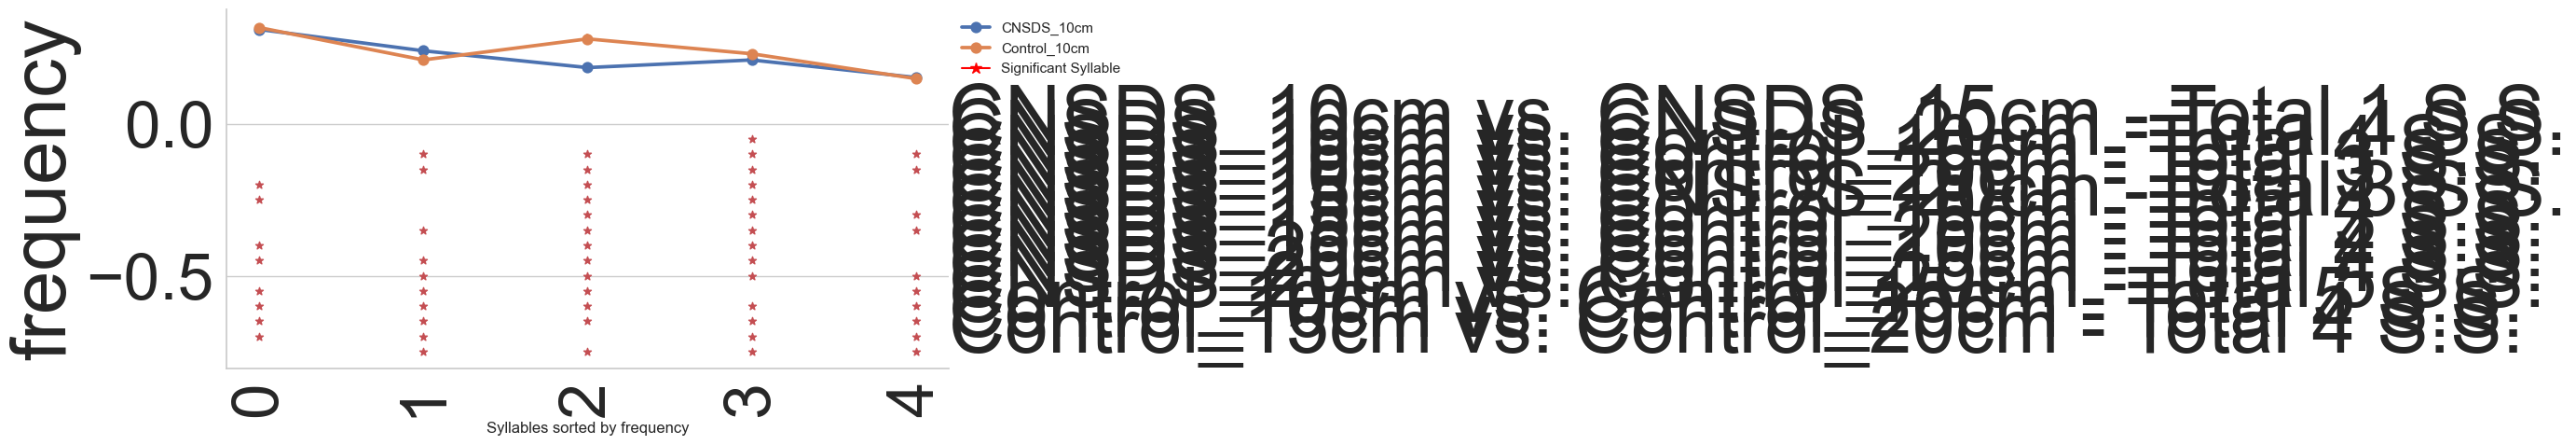

In [ ]:
# kpms.plot_syll_stats_with_sem(
#     stats_df, project_dir, model_name,
#     plot_sig=True,    # whether to mark statistical significance with a star
#     thresh=0.05,      # significance threshold
#     stat='frequency', # statistic to be plotted (e.g. 'duration' or 'velocity_px_s_mean')
#     order='stat',     # order syllables by overall frequency ("stat") or degree of difference ("diff")
#     ctrl_group='a',   # name of the control group for statistical testing
#     exp_group='b',    # name of the experimental group for statistical testing
#     figsize=(10, 5),   # figure size    
#     groups=df_10cm['group'].unique(), # groups to be plotted
# );

# # Get the current axis after the plot is created
# #ax = plt.gca()

# # Set the title
# #ax.set_title('Syllables Duration', fontsize=20)

# # Show the plot
# plt.show()

In [ ]:
# df_15cm=stats_df.copy()
# df_15cm=df_15cm[(df_15cm['group']=='Control_15cm') | (df_15cm['group']=='CNSDS_15cm')]

In [ ]:
# df_20cm=stats_df.copy()
# df_20cm=df_20cm[(df_20cm['group']=='Control_20cm') | (df_20cm['group']=='CNSDS_20cm')]

c:\Users\Jillian.Sucher\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Jillian.Sucher\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Saved figure to D:\Barrier_testing_day1_videos\2025_04_30-15_25_52\figures\frequency_stat_stats.png


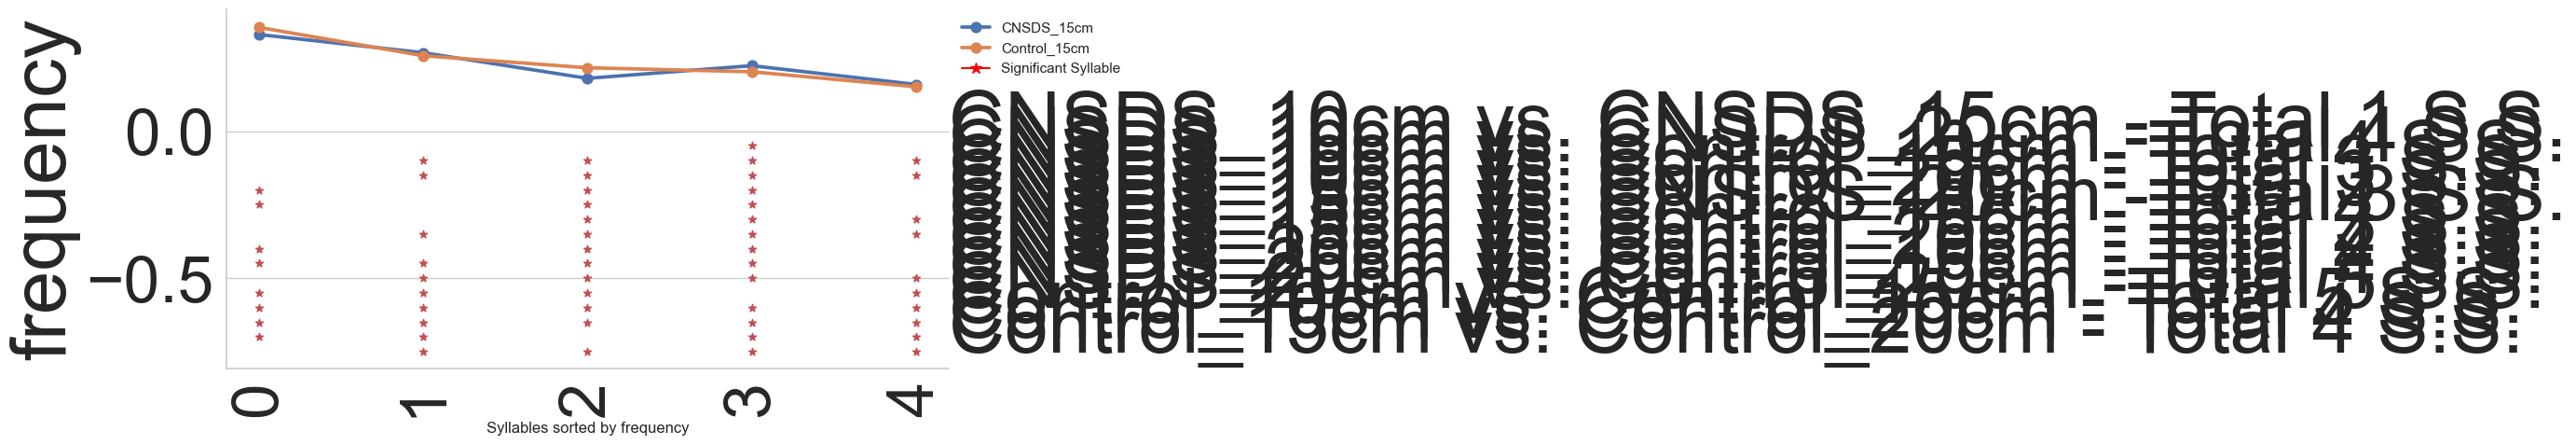

In [ ]:
# kpms.plot_syll_stats_with_sem(
#     stats_df, project_dir, model_name,
#     plot_sig=True,    # whether to mark statistical significance with a star
#     thresh=0.05,      # significance threshold
#     stat='frequency', # statistic to be plotted (e.g. 'duration' or 'velocity_px_s_mean')
#     order='stat',     # order syllables by overall frequency ("stat") or degree of difference ("diff")
#     ctrl_group='a',   # name of the control group for statistical testing
#     exp_group='b',    # name of the experimental group for statistical testing
#     figsize=(10, 5),   # figure size    
#     groups=df_15cm['group'].unique(), # groups to be plotted
# );

# # Get the current axis after the plot is created
# #ax = plt.gca()

# # Set the title
# #ax.set_title('Syllables Duration', fontsize=20)

# # Show the plot
# plt.show()

c:\Users\Jillian.Sucher\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Jillian.Sucher\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Saved figure to D:\Barrier_testing_day1_videos\2025_04_30-15_25_52\figures\frequency_stat_stats.png


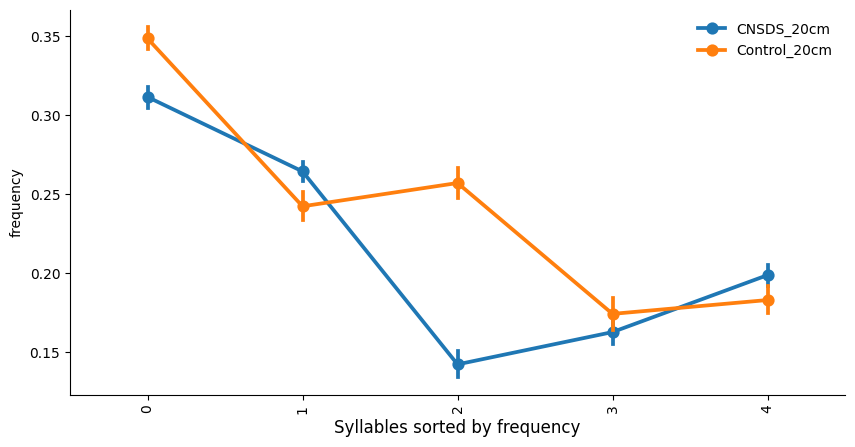

In [ ]:
# kpms.plot_syll_stats_with_sem(
#     stats_df, project_dir, model_name,
#     plot_sig=False,    # whether to mark statistical significance with a star
#     thresh=0.05,      # significance threshold
#     stat='frequency', # statistic to be plotted (e.g. 'duration' or 'velocity_px_s_mean')
#     order='stat',     # order syllables by overall frequency ("stat") or degree of difference ("diff")
#     ctrl_group='a',   # name of the control group for statistical testing
#     exp_group='b',    # name of the experimental group for statistical testing
#     figsize=(10, 5),   # figure size    
#     groups=df_20cm['group'].unique(), # groups to be plotted
# );

# # Get the current axis after the plot is created
# #ax = plt.gca()

# # Set the title
# #ax.set_title('Syllables Duration', fontsize=20)

# # Show the plot
# plt.show()

In [ ]:
syll_include

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

# transition matrices

Group(s): CNSDS_10cm, CNSDS_15cm, CNSDS_20cm, Control_10cm, Control_15cm, Control_20cm
Saved figure to D:\Barrier_testing_day1_videos\2025_05_29-18_08_08\figures\transition_matrices.png


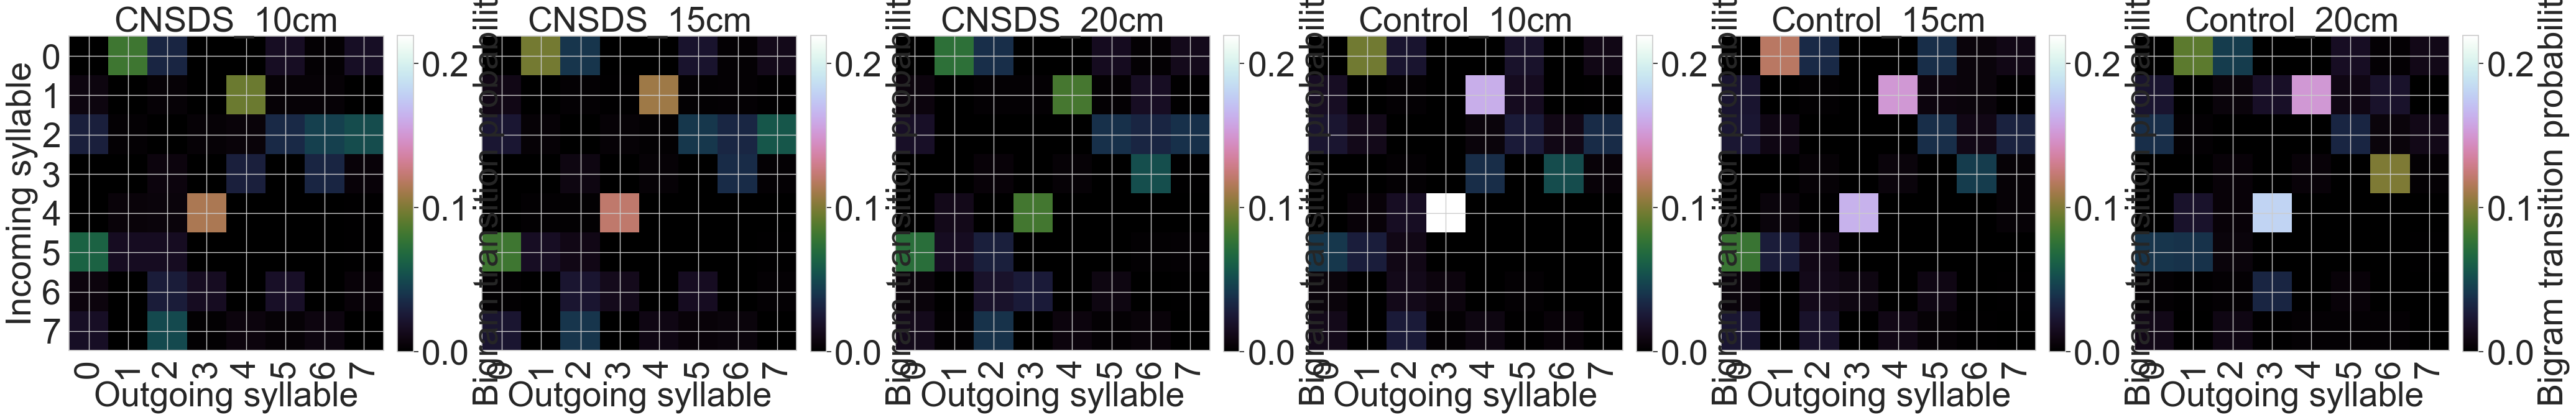

In [210]:
normalize='bigram' # normalization method ("bigram", "rows" or "columns")

# Set font size globally
plt.rcParams.update({
    'font.size': 40,         # axes labels, ticks
    'axes.titlesize': 40,    # subplot titles
    'axes.labelsize': 40,    # x and y labels
    'xtick.labelsize': 40,   # x-axis tick labels
    'ytick.labelsize': 40    # y-axis tick labels
})  # Change 20 to your desired font size

trans_mats, usages, groups, syll_include=kpms.generate_transition_matrices(
    project_dir, model_name, normalize=normalize,
    min_frequency=0.05 # minimum syllable frequency to include
)    

kpms.visualize_transition_bigram(
    project_dir, model_name, groups, trans_mats, syll_include, normalize=normalize, 
    show_syllable_names=False, figsize= (50,50) # label syllables by index (False) or index and name (True)
)

plt.savefig("transition_matrices.pdf", format="pdf")

In [251]:
trans_mats[0].shape

(8, 8)

Saved figure to D:\Barrier_testing_day1_videos\2025_05_29-18_08_08\figures\transition_graphs.png


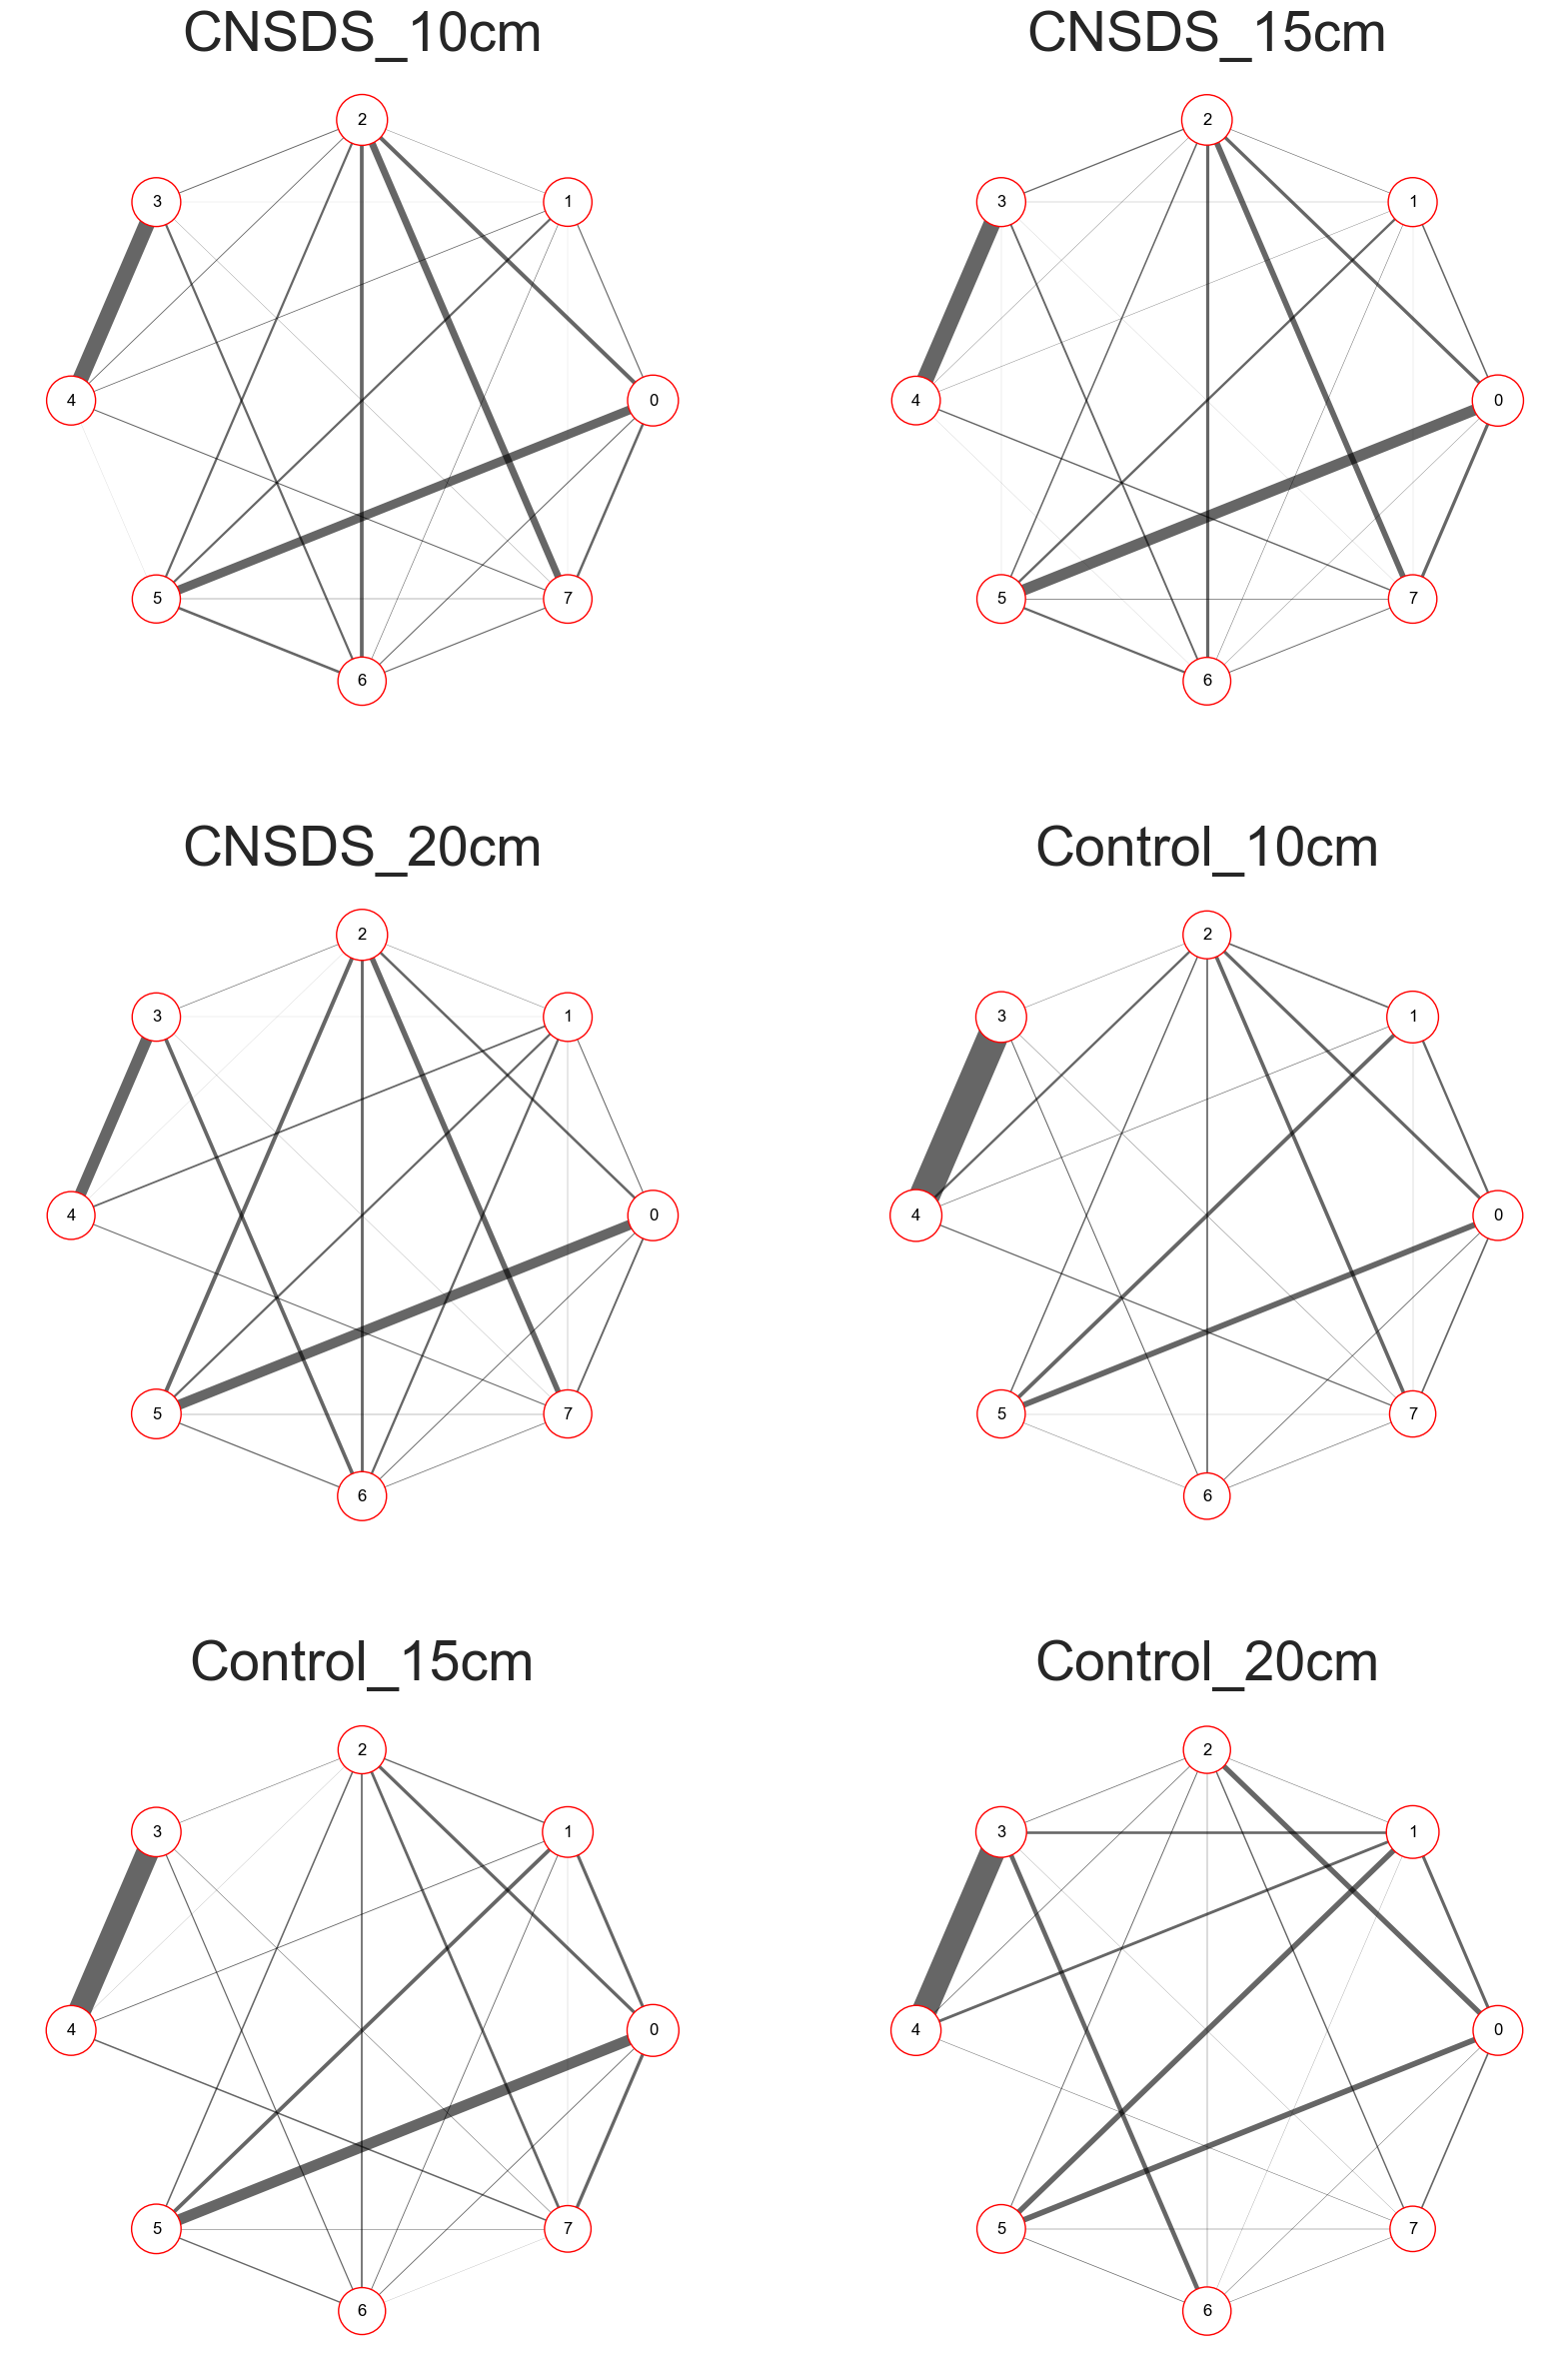

In [209]:
# Generate a transition graph for each single group

kpms.plot_transition_graph_group(
    project_dir, model_name, 
    groups, trans_mats, usages, syll_include, 
    layout='circular',        # transition graph layout ("circular" or "spring")
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)

In [ ]:
syll_include

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [211]:
usages

[array([0.16187253, 0.10208686, 0.16300056, 0.11280316, 0.11675127,
        0.09475465, 0.09757473, 0.10321489]),
 array([0.17058428, 0.11551377, 0.1531229 , 0.11417058, 0.10611148,
        0.10678308, 0.08327737, 0.10275353]),
 array([0.14115433, 0.10414053, 0.15809285, 0.09473024, 0.08406524,
        0.12358846, 0.1097867 , 0.08908407]),
 array([0.13900862, 0.18642241, 0.09051724, 0.16163793, 0.18857759,
        0.09590517, 0.0549569 , 0.05172414]),
 array([0.19117647, 0.15900735, 0.09191176, 0.12959559, 0.13878676,
        0.13143382, 0.06985294, 0.05974265]),
 array([0.13689095, 0.21345708, 0.07308585, 0.1612529 , 0.1450116 ,
        0.10788863, 0.09976798, 0.03364269])]

Saved figure to D:\Barrier_testing_day1_videos\2025_05_29-18_08_08\figures\transition_graphs_diff.png


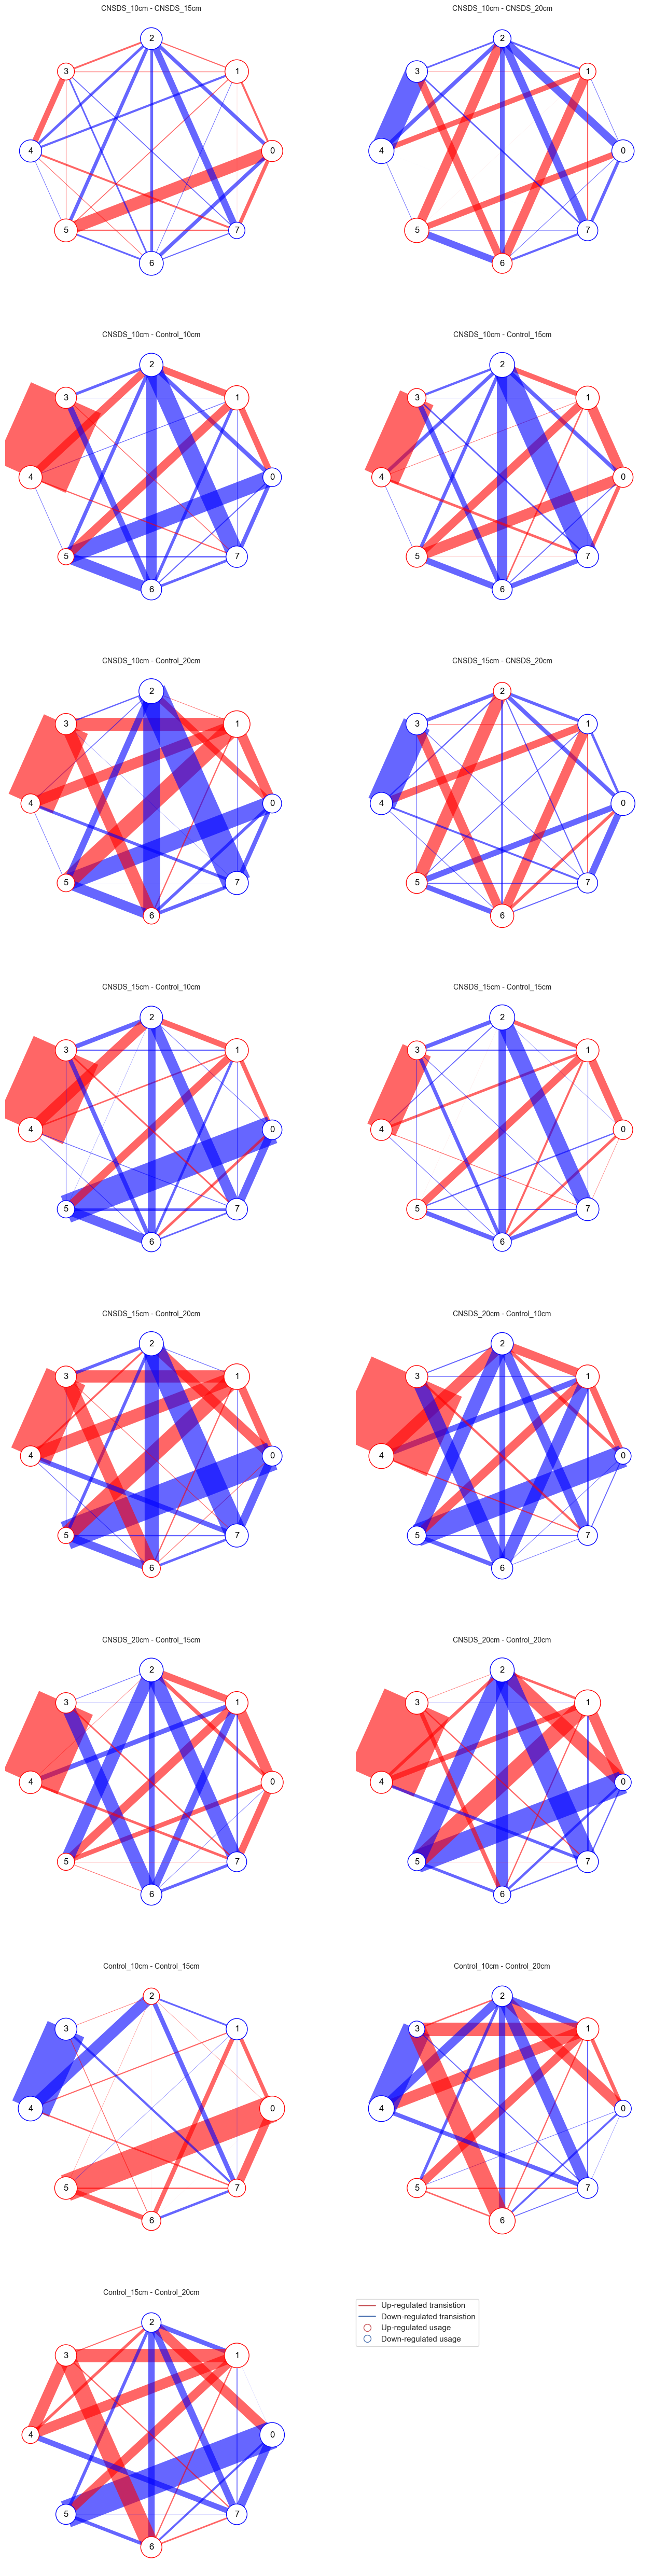

In [228]:
## Flip groups and calculate p-values!

# Generate a difference-graph for each pair of groups.

plt.rcParams.update({'font.size': 8})
fig, all_axes = kpms.plot_transition_graph_difference(project_dir, model_name, 
                                      groups, trans_mats, usages, syll_include, 
                                      layout='circular') # transition graph layout ("circular" or "spring")

plt.savefig(r"D:\Figures\transition_differences.pdf", format="pdf")

C:\Users\Jillian.Sucher\AppData\Local\Temp\ipykernel_19812\3502163704.py:13: MatplotlibDeprecationWarning:

The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.



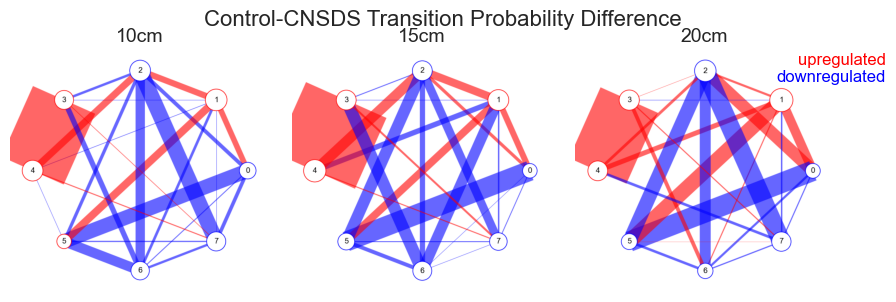

In [265]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig.canvas = FigureCanvas(fig)  # ensure we have an Agg canvas
# ----------------------------------------------------------

# indices of the panels you want
plots = [2, 9, 11]
old_axes = fig.axes

# 1) Draw the figure to the Agg canvas and grab the RGB buffer
fig.canvas.draw()
w, h = fig.canvas.get_width_height()
buf = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
img = buf.reshape(h, w, 3)

# 2) New figure with 1×3 axes for the crops
new_fig, new_axes = plt.subplots(1, len(plots), figsize=(len(plots)*3, 3))

titles = ['10cm', '15cm', '20cm']
for i,(new_ax, idx) in enumerate(zip(new_axes, plots)):
    ax = old_axes[idx]
    # get the pixel bbox of the subplot in display coords
    renderer = fig.canvas.get_renderer()
    bbox = ax.get_window_extent(renderer)
    # convert to ints, and correct for numpy’s (0,0)=top‐left
    x0, y0 = int(bbox.x0), int(bbox.y0)
    x1, y1 = int(bbox.x1), int(bbox.y1)
    # matplotlib’s y0=bottom, numpy’s row=top, so:
    crop = img[h - y1 : h - y0, x0 : x1, :]

    new_ax.imshow(crop)
    new_ax.axis('off')  # remove axes framing
    new_ax.set_title(titles[i],fontsize=14)
new_ax.text(1.2, 0.99,                   # (x, y) in axes-fraction coords
            "upregulated",             # your legend text (can be multi-line)
            transform=new_ax.transAxes,  # use axes fraction, not data coords
            va="top", ha="right",         # align text box
            fontsize=12,
            color="red",
            )
new_ax.text(1.2, .92,                   # (x, y) in axes-fraction coords
            "downregulated",             # your legend text (can be multi-line)
            transform=new_ax.transAxes,  # use axes fraction, not data coords
            va="top", ha="right",         # align text box
            fontsize=12,
            color="blue",
            )
new_fig.suptitle('Control-CNSDS Transition Probability Difference',fontsize=16)
new_fig.tight_layout()
plt.show()

new_fig.savefig(r'D:\Figures\transition_diffs_3plots.png')

In [223]:
og_ax = all_axes.ravel()

In [227]:
fig2 = plt.copy(fig)
fig2

AttributeError: module 'matplotlib.pyplot' has no attribute 'copy'

# Old- Average syllable calculations

In [ ]:
# stats_df = kpms.compute_stats_df(
#     project_dir,
#     model_name,
#     moseq_df, 
#     min_frequency=0.001,       # threshold frequency for including a syllable in the dataframe
#     groupby=['group', 'name'], # column(s) to group the dataframe by
#     fps=60)                    # frame rate of the video from which keypoints were inferred

# stats_df


KeyError: 'group'

In [ ]:
# # Count rows where 'Condition' is 'Control' or 'CNSDS'
# control_count = stats_df[stats_df['group'] == 'Control_20cm'].shape[0]
# cnsds_count = stats_df[stats_df['group'] == 'CNSDS_20cm'].shape[0]

# print("Number of 'Control' rows:", control_count)
# print("Number of 'CNSDS' rows:", cnsds_count)

Number of 'Control' rows: 943
Number of 'CNSDS' rows: 1200


In [ ]:
# import scipy.stats as stats
# import numpy as np
# import pandas as pd
# import glob as glob
# import matplotlib.pyplot as plt
# import matplotlib
# import scipy as scipy
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# from matplotlib.backends.backend_pdf import PdfPages
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams.update({'font.size': 10})

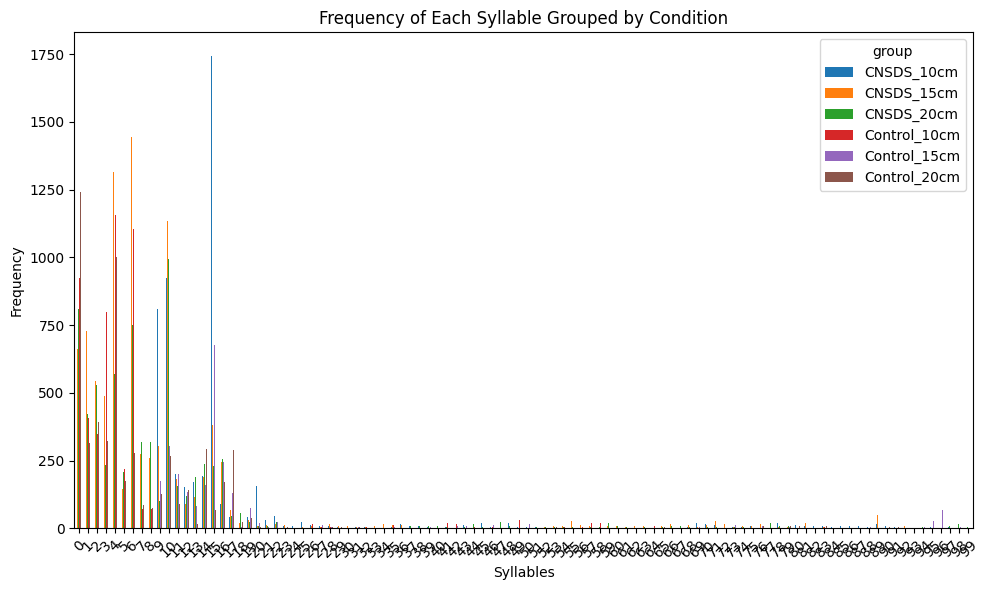

In [ ]:
# import matplotlib.pyplot as plt

# # Group by 'condition' and 'syllable' to calculate the frequency
# syllable_counts = moseq_df.groupby(['group', 'syllable']).size().reset_index(name='frequency')

# # Pivot the data to have conditions as columns and syllables as rows
# syllable_pivot = syllable_counts.pivot_table(index='syllable', 
#                                              columns='group', 
#                                              values='frequency', 
#                                              aggfunc='sum', 
#                                              fill_value=0)

# # Plotting the bar graph
# syllable_pivot.plot(kind='bar', figsize=(10, 6))

# # Adding labels and title
# plt.xlabel('Syllables')
# plt.ylabel('Frequency')
# plt.title('Frequency of Each Syllable Grouped by Condition')

# # Rotate the x-axis labels for better visibility if needed
# plt.xticks(rotation=45)

# # Show the plot
# plt.tight_layout()
# plt.show()



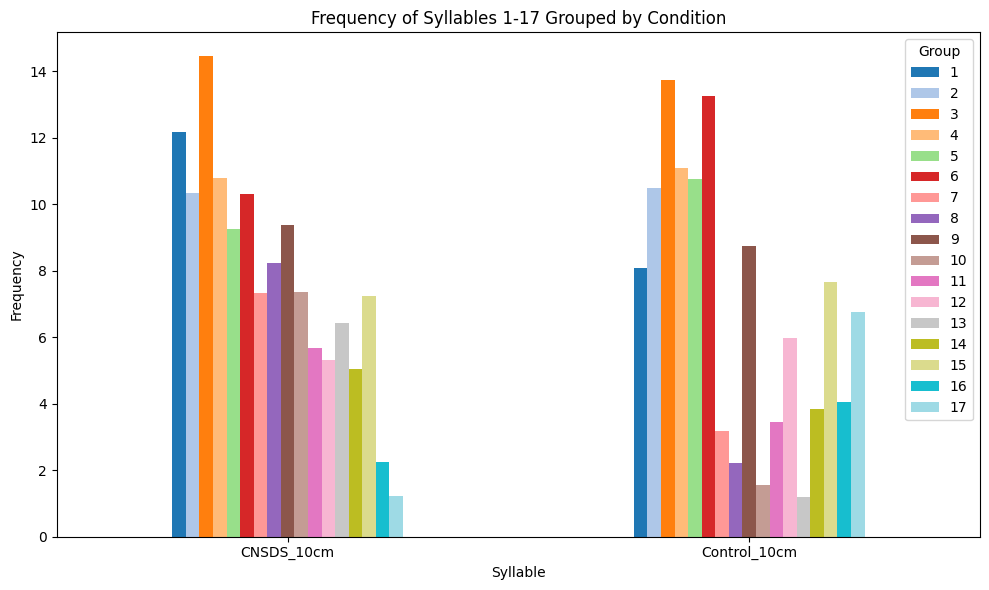

In [ ]:
# import matplotlib.pyplot as plt

# # Filter the rows where syllables are between 1 and 17
# filtered_df = df_10cm[df_10cm['syllable'].between(1, 17)]

# # Group by 'group' and 'syllable' to calculate the frequency
# grouped_syllable_freq = filtered_df.groupby(['group', 'syllable'])['frequency'].sum().unstack(fill_value=0)

# # Plotting the frequency of syllables 1-17 with 'group' as the legend
# ax = grouped_syllable_freq.plot(kind='bar', figsize=(10, 6), stacked=False, colormap='tab20')

# # Adding labels and title
# plt.xlabel('Syllable')
# plt.ylabel('Frequency')
# plt.title('Frequency of Syllables 1-17 Grouped by Condition')

# # Show legend with the group labels
# plt.legend(title='Group', loc='upper right')

# # Rotate the x-axis labels for better visibility
# plt.xticks(rotation=0)

# # Show the plot
# plt.tight_layout()
# plt.show()


In [ ]:
#help(kpms.generate_transition_matrices)

Help on function generate_transition_matrices in module keypoint_moseq.analysis:

generate_transition_matrices(project_dir, model_name, normalize='bigram', min_frequency=0.005)
    Generate the transition matrices for each recording.
    
    Parameters
    ----------
    progress_paths : dict
        the dictionary of paths to the files in the analysis progress
    normalize : str, optional
        the method to normalize the transition matrix, by default 'bigram'
    
    Returns
    -------
    trans_mats : list
        the list of transition matrices for each group

